<br>
<font>
<!-- <img src="https://sina.sharif.edu/~m_salehi/images/logo_sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://sina.sharif.edu/~m_salehi/images/logo_sharif.png" width=160 height=180>
<br>
<font color=0F5298 size=6>
Introduction to Machine Learning <br>
<font color= 6C3BAA size=6>
Clustering <br>
<font color=696880 size=5>
<!-- <br> -->
Computer Engineering Department
<br>
Sharif University of Technology

<font color=696880 size=5>
<br>
CE 40477 - Fall 2025

<font color=GREEN size=5>
<br>
Diba Hadi & Farzan Rahmani
<!-- <br> -->

____

# Table of Contents


*   ## [Unsepervised Learning](#Unsupervised_Learning)
    *   ### [Kmeans](#Kmeans)
    *  ### [How to improve Kmeans](#How_to_improve_Kmeans)
        * #### [Elbow Method](#Elbow_Method)
        * #### [Silhouette Score](#Silhouette_Score)
        * #### [Davies-Bouldin Index (DB Index)](#Davies-Bouldin)
    *  ### [Centroid Initialization Methods](#Centroid_Initialization)
        *   #### [Random Initialization in K-means](#Random)
        *   #### [K-means++](#K-means++)
    *  ### [Applications](#Applications)
        *   #### [Image Segmentation](#Image_Segmentation)
        *   #### [Customer Segmentation](#Customer_Segmentation)
        *   #### [Anomaly Detection](#Anomaly_Detection)
        *   #### [Image Compression](#Image_Compression)
        *   #### [Data Samplification](#Data_Samplification)

<a id='Unsupervised_Learning'></a>
# Unsupervised Learning


Unsupervised learning is a machine learning technique that groups data points together without the use of labeled data. Clustering is a type of unsupervised learning that uses algorithms to group data into clusters based on similarities.

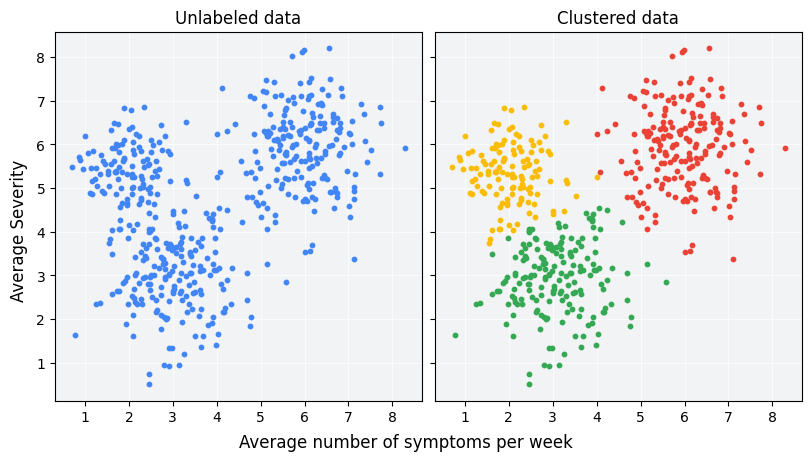

Clustering is the process of arranging a group of objects in such a manner that the objects in the same group (which is referred to as a cluster) are more similar to each other than to the objects in any other group.  Data professionals often use clustering in the Exploratory Data Analysis phase to discover new information and patterns in the data. As clustering is unsupervised machine learning, it doesn’t require a labeled dataset.

Clustering itself is not one specific algorithm but the general task to be solved. You can achieve this goal using various algorithms that differ significantly in their understanding of what constitutes a cluster and how to find them efficiently.

# KMeans


K-means clustering is a simple and popular type of unsupervised machine learning algorithm, which is used on unlabeled data. The goal of this algorithm is toﬁnd groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups according to provided features similarity.The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion:

$$
\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)
$$

# How the algorithm works

The Κ-means clustering algorithm uses iterative refinement to produce a final result. The algorithm inputs are the number of clusters $k$ and the data set. The data set is a collection of features for each data point. The algorithms starts with initial estimates for the $k$ centroids, which can either be randomly generated or randomly selected from the data set. The algorithm then iterates between two steps:

**Data assigment step:**
Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, based on the squared Euclidean distance. More formally, if $c_i$ is the collection of centroids in set $C$, then each data point $x$ is assigned to a cluster based on:


$$
\arg \min_{c_i \in C}\:dist{(c_i,x)}^2
$$

\
where dist( · ) is the standard ($L_2$) Euclidean distance. Let the set of data point assignments for each ith cluster centroid be $S_i$.

\
**Centroid update step:** In this step, the centroids are recomputed. This is done by taking the mean of all data points assigned to that centroid's cluster.

$$
c_i=\frac{1}{|S_i|}\sum_{x \in S_i}x
$$
\
The algorithm iterates between steps one and two until a stopping criteria is met (i.e., no data points change clusters, the sum of the distances is minimized, or some maximum number of iterations is reached).

\
**Convergence and random initialization:**
This algorithm is guaranteed to converge to a result. The result may be a local optimum (i.e. not necessarily the best possible outcome), meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

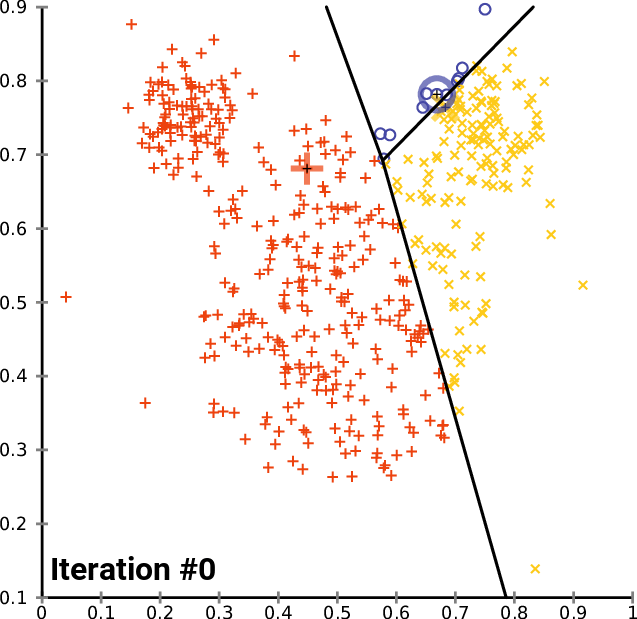

# KMeans Implement

### Importing the libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
np.random.seed(42)

### Loading the Data

**The Dataset**

In this tutorial, we will be using California housing data. We will use location data (latitude and longitude) as well as the median house value. We will cluster the houses by location and observe how house prices fluctuate across California. We save the dataset as a csv file called `housing.csv` in our working directory and read it using `pandas`.

In [2]:
home_data = pd.read_csv('assets/housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


The data include 3 variables that we have selected using the usecols parameter:

*   **longitude:** A value representing how far west a house is. Higher values represent houses that are further West.
*   **latitude:** A value representing how far north a house is. Higher values represent houses that are further north.
*   **median_house_value:** The median house price within a block measured in USD.

### Visualize the Data

We start by visualizing our housing data. We look at the location data with a heatmap based on the median price in a block. We will use Seaborn to quickly create plots in this tutorial

<Axes: xlabel='longitude', ylabel='latitude'>

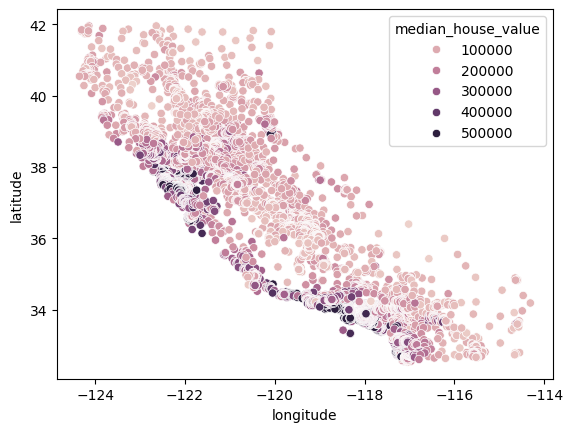

In [3]:
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

We see that most of the expensive houses are on the west coast of California with different areas that have clusters of moderately priced houses. This is expected as typically waterfront properties are worth more than houses that are not on the coast.

### Normalizing the Data

When working with distance-based algorithms, like k-Means Clustering, we must normalize the data. If we do not normalize the data, variables with different scaling will be weighted differently in the distance formula that is being optimized during training. For example, if we were to include price in the cluster, in addition to latitude and longitude, price would have an outsized impact on the optimizations because its scale is significantly larger and wider than the bounded location variables.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

### Fitting and Evaluating the Model

For the first iteration, we will arbitrarily choose a number of clusters (referred to as k) of 3. Building and fitting models in sklearn is very simple. We will create an instance of KMeans, define the number of clusters using the `n_clusters` attribute, set `n_init`, which defines the number of iterations the algorithm will run with different centroid seeds, to “auto”, and we will set the `random_state` to 0 so we get the same result each time we run the code.  We can then fit the model to the normalized training data using the `fit()` method.

In [7]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


<Axes: xlabel='longitude', ylabel='latitude'>

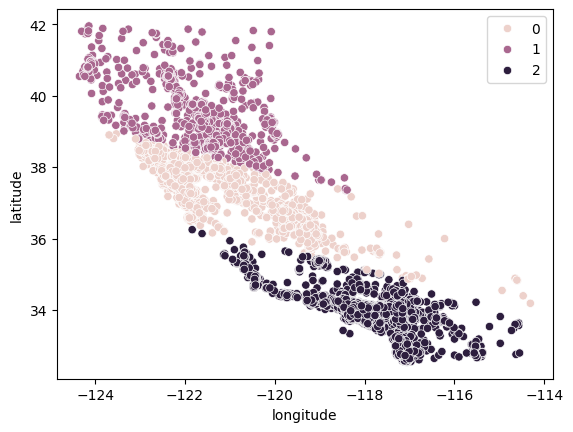

In [8]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

### Ploting The Results

We see that the data are now clearly split into 3 distinct groups (Northern California, Central California, and Southern California). We can also look at the distribution of median house prices in these 3 groups using a boxplot.

<Axes: ylabel='median_house_value'>

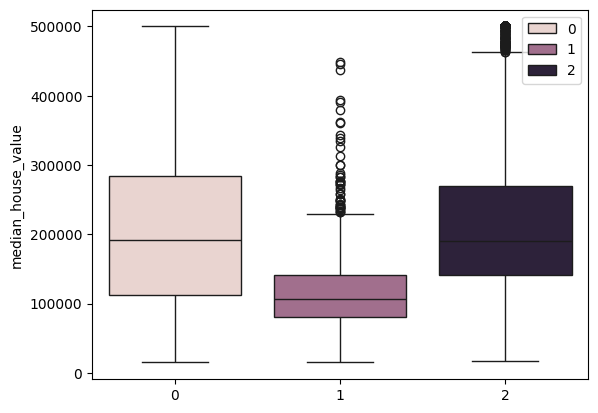

In [9]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'], hue=kmeans.labels_)

We clearly see that the Northern and Southern clusters have similar distributions of median house values (clusters 0 and 2) that are higher than the prices in the central cluster (cluster 1).

Since we have not looked at the strength of different numbers of clusters, we do not know how good of a fit the k = 3 model is. In the next section, we will explore different clusters and compare performance to make a decision on the best hyperparameter values for our model.

### Choosing the best number of clusters

The weakness of k-means clustering is that we don’t know how many clusters we need by just running the model. We need to test ranges of values and make a decision on the best value of k. We typically make a decision using the Elbow method to determine the optimal number of clusters where we are both not overfitting the data with too many clusters, and also not underfitting with too few.

<Axes: xlabel='longitude', ylabel='latitude'>

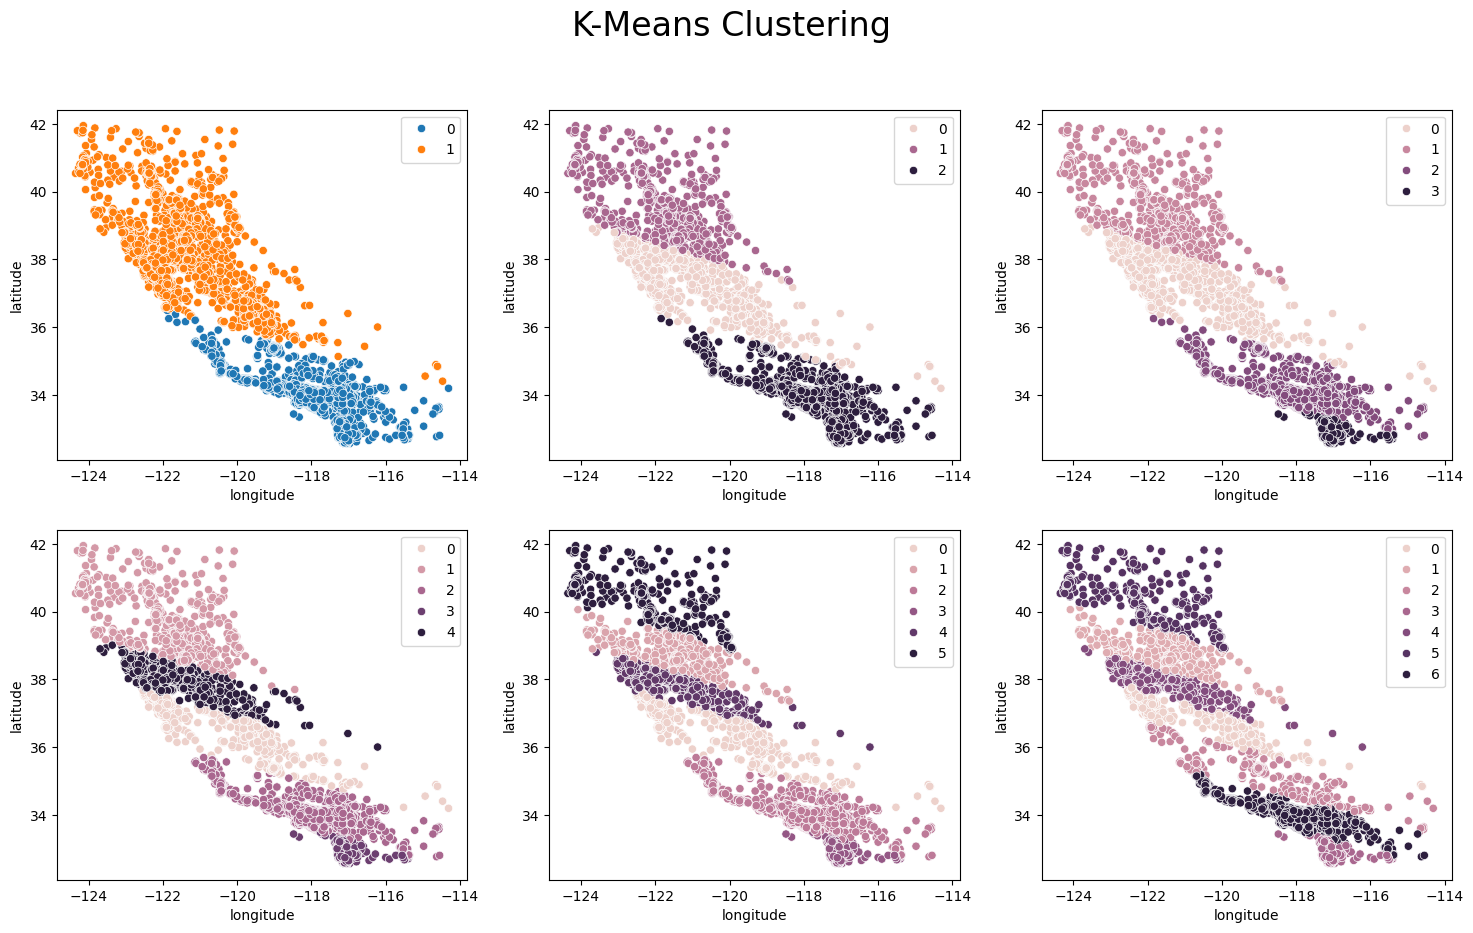

In [10]:
K = range(2, 8)
fits = []

for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)

    # append the model to fits
    fits.append(model)

f, axes = plt.subplots(2, 3, figsize=(18, 10))
f.suptitle('K-Means Clustering', fontsize=24)
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_, ax=axes[0,0])
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[1].labels_, ax=axes[0,1])
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_, ax=axes[0,2])
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_, ax=axes[1,0])
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[4].labels_, ax=axes[1,1])
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[5].labels_, ax=axes[1,2])

To determine the optimal number of clusters, we have to select the value of k at the “Elbow”. In the next two section, we have explained in detail about the elbow. Thus for the given data, we conclude that the optimal number of clusters for the data is 5. We see `k = 5` is probably the best we can do without `overfitting`.

In [11]:
kmeans = KMeans(n_clusters = 5, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


<Axes: xlabel='longitude', ylabel='latitude'>

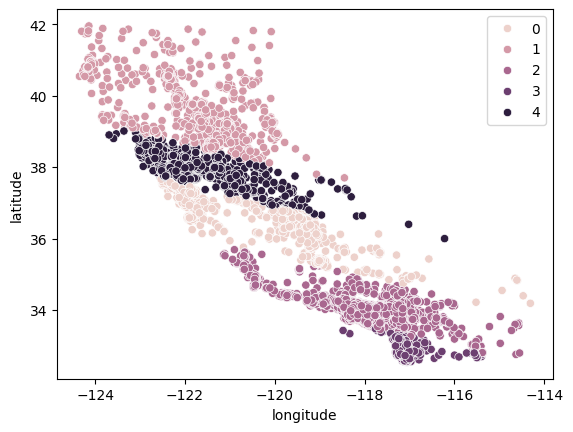

In [12]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

<Axes: ylabel='median_house_value'>

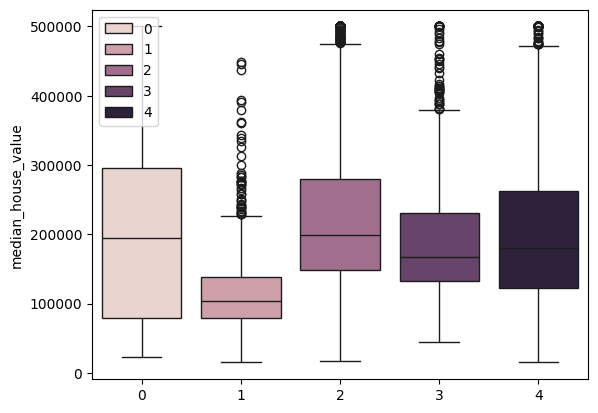

In [13]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'], hue=kmeans.labels_)

# From Scratch Implementation

Assuming we have input data points $x_1,x_2,x_3,…,x_n$ and value of $K$ (the number of clusters needed). We follow the below procedure:


1.   Pick $K$ points as the initial centroids from the dataset, either randomly or the first $K$.
2.   Find the Euclidean distance of each point in the dataset with the identified $K$ points (cluster centroids).
3.  Assign each data point to the closest centroid using the distance found in the previous step.
4. Find the new centroid by taking the average of the points in each cluster group.
5. Repeat 2 to 4 for a fixed number of iteration or till the centroids don’t change.





**Dataset:** The datasets provided include the players data for the Career Mode from FIFA 15 to FIFA 22 ("players_22.csv"). The data allows multiple comparisons for the same players across the last 8 version of the videogame.

In [15]:
players = pd.read_csv("assets/players_22.csv")
players.head()

/tmp/ipykernel_22936/1410294446.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("assets/players_22.csv")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


We selected some columns as features for our clustering

In [16]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [17]:
players = players.dropna(subset=features)

In [18]:
data = players[features].copy()
data.head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


### Scale data to standardize values

**Min-Max Normalization**: Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

In [19]:
data = ((data - data.min()) / (data.max() - data.min()))

In [20]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,0.407830,0.480000,0.024383,0.014647,0.340372
std,0.149626,0.132342,0.055725,0.039248,0.175093
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.304348,0.391304,0.001431,0.002402,0.185185
50%,0.413043,0.478261,0.007153,0.004980,0.333333
75%,0.500000,0.565217,0.021459,0.010263,0.481481
max,1.000000,1.000000,1.000000,1.000000,1.000000


There are various methods of assigning $k$ - centroid initially. We used random selection for initialing centroids.

In [21]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [22]:
centroids = random_centroids(data, 5)

/tmp/ipykernel_22936/1845334667.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [23]:
centroids

,0,1,2,3,4
overall,0.217391,0.173913,0.478261,0.413043,0.347826
potential,0.391304,0.695652,0.673913,0.565217,0.369565
wage_eur,0.064378,0.018598,0.253219,0.001144,0.001431
value_eur,0.007686,0.003175,0.002660,0.123671,0.020573
age,0.296296,0.259259,0.333333,0.481481,0.481481


#### Euclidean Distance between two points in space:

We find the euclidean distance from each point to all the centroids.

$$d(p,q)= \sqrt{{(q_1 - p_1)}^2 + {(q_2 - p_2)}^2}$$

\
Now, In order to know which cluster an data items belongs to, we are calculating euclidean distance from the data items to each centroid. Data item closest to the cluster belongs to that respective cluster.
If each cluster centroid is denoted by $c_i$, then each data point $x$ is assigned to a cluster based on
$$arg\min\ dist{(c_i,x)}^2$$

In [24]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [25]:
labels = get_labels(data, centroids)

In [26]:
labels.value_counts()

4    5566
0    5465
3    3786
2    2438
1    1910
Name: count, dtype: int64

**Finding the new centroid from the clustered group of points:**

In [27]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

We've now completed the K Means scratch code of this Machine Learning tutorial series. Now lets test our code by clustering:

In [28]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [29]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

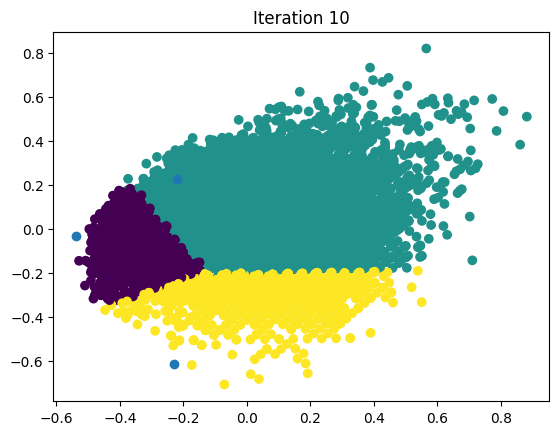

In [30]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [31]:
centroids

,0,1,2
overall,0.000000,0.430168,0.000000
potential,0.358116,0.507919,0.000000
wage_eur,0.000000,0.000000,0.000000
value_eur,0.001095,0.008173,0.000000
age,0.000000,0.000000,0.554538


In [32]:
kmeans = KMeans(3)
kmeans.fit(data)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


# How to improve KMeans

## Optimal K for K-Means

There are several numbers of methods for figuring out number of clusters that work differently. The weakness of k-means clustering is that we don’t know how many clusters we need by just running the model. We need to test ranges of values and make a decision on the best value of k.
In this section, we will discuss `Elbow Method` and `Silhouette Coefficient` and compare them.
We typically make a decision using these methods to determine the optimal number of clusters where we are both not overfitting the data with too many clusters, and also not underfitting with too few.

### **Elbow Method**

The **Elbow Method** is one of the most commonly used techniques to determine the optimal number of clusters (K) in K-means clustering. It is based on **inertia**, which measures the sum of squared distances between each data point and its nearest centroid.

- **Inertia** decreases as the number of clusters increases. This is because, with more clusters, each point is likely to be closer to its assigned centroid.
- The goal is to find the "elbow" in the plot of inertia vs. K. The **elbow point** represents the point where adding more clusters does not result in a significant decrease in inertia. This indicates that further increasing K is not improving the model substantially.
- The point where the **inertia curve starts flattening** is considered the optimal number of clusters.

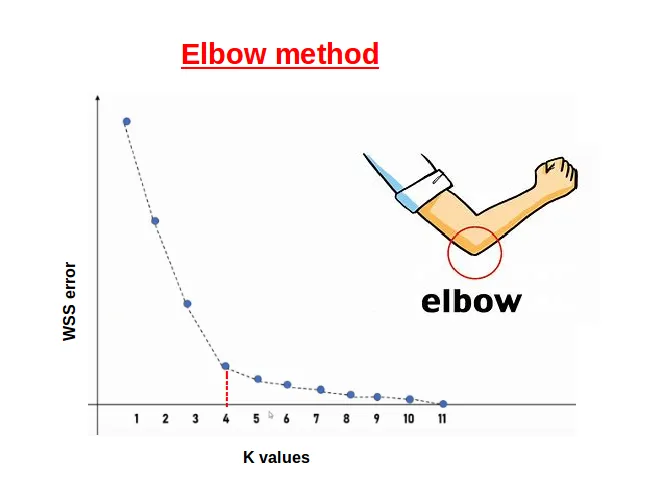

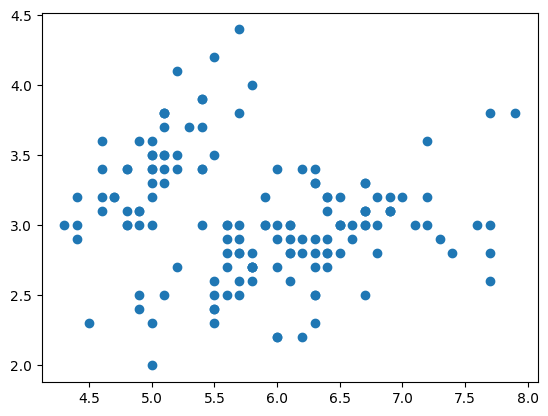

In [33]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

plt.scatter(X[:, 0], X[:, 1])
plt.show()

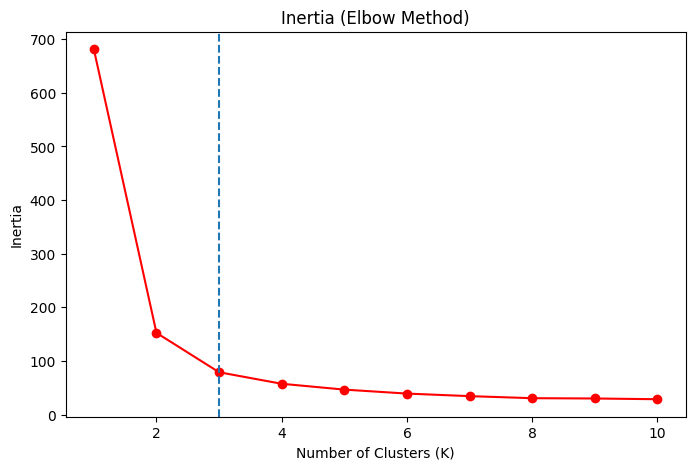

In [34]:
# Inertia (Elbow Method)
def compute_inertia(X, max_k=10):
    inertia_vals = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia_vals.append(kmeans.inertia_)
    return inertia_vals

inertia_vals = compute_inertia(X, max_k=10)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_vals, marker='o', color="red")
plt.axvline(x=3, ls='--')
plt.title('Inertia (Elbow Method)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

### **Silhouette Score**

The **Silhouette Score** measures how well each data point fits within its assigned cluster compared to how well it fits in other clusters. The silhouette score for a data point is calculated as:

$$
S = \frac{(b - a)}{\max(a, b)}
$$

Where:
- **a** is the mean intra-cluster distance (the average distance between a point and other points within the same cluster).
- **b** is the mean nearest-cluster distance (the average distance between a point and the points in the nearest cluster).

- **Silhouette Score Range**: The score ranges from **-1** to **1**.
  - A value close to **1** indicates that the point is well clustered.
  - A value close to **0** means that the point is on or very close to the decision boundary between clusters.
  - A negative value indicates that the point might have been assigned to the wrong cluster.

The optimal K is the one that maximizes the silhouette score, indicating that the clusters are well-separated and compact.


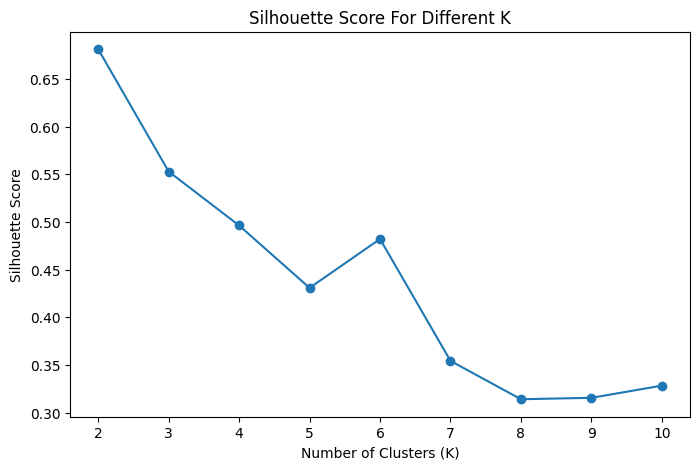

In [35]:
from sklearn.metrics import silhouette_score

sil = []
max_k = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, max_k+1):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil, marker='o')
plt.title('Silhouette Score For Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

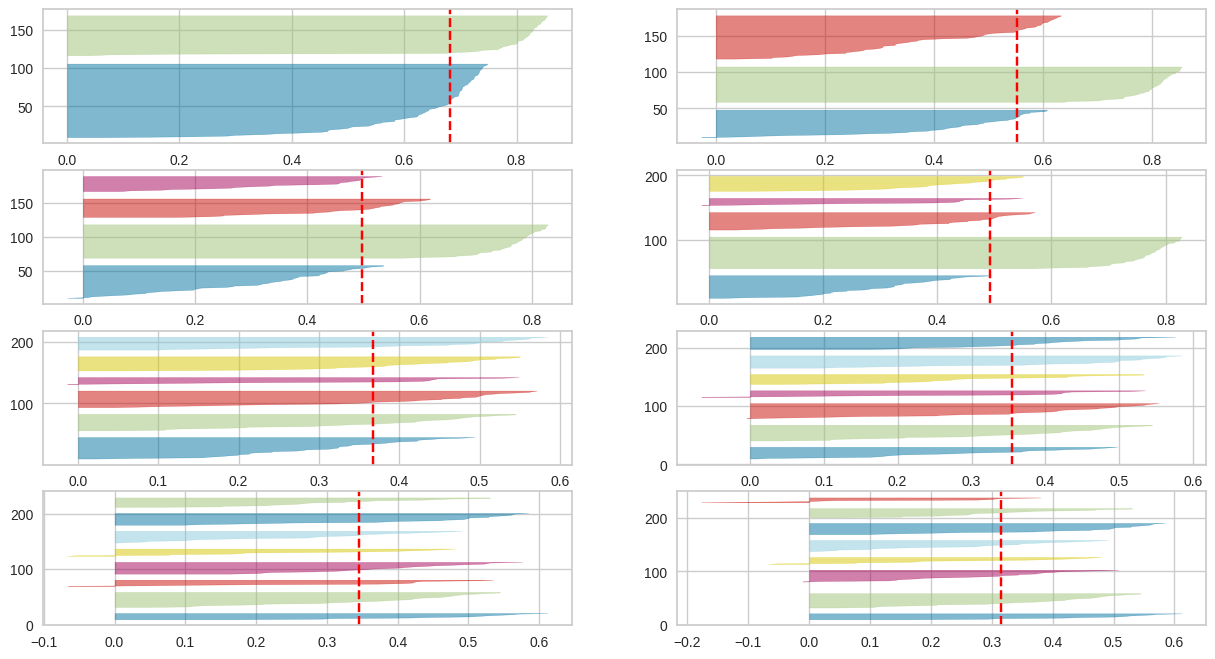

In [37]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(15,8))
for k in range(2, 10):
    #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=k, random_state=42)
    q, mod = divmod(k, 2)

    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

A **Silhouette Plot** is a graphical representation of the silhouette coefficient for each data point. It shows:
- **Silhouette width for each point**: A wider silhouette indicates better clustering for that point.
- **Separation between clusters**: The plot shows how distinct the clusters are from one another. Large gaps between clusters suggest better-defined clusters.

In a **Silhouette Plot**:
- Each cluster is represented by a horizontal bar of silhouette scores for the points in that cluster.
- The points are ordered by silhouette score within each cluster.
- A red dashed line shows the **average silhouette score** for all points.

**Interpreting Silhouette Analysis**

1. **Positive Silhouette Coefficients**: A positive silhouette score indicates that the data point is well within the boundary of its cluster.
2. **Negative Silhouette Coefficients**: A negative silhouette score means the point is likely in the wrong cluster.
3. **Cluster Separation**: The gaps between the clusters in the silhouette plot indicate how distinct the clusters are. Large gaps suggest better-defined clusters, while overlapping bars suggest poorly separated clusters.
4. **Choosing the Optimal Number of Clusters**: Silhouette analysis can help choose the optimal number of clusters by comparing the **average silhouette score** for different numbers of clusters (K). The best K is typically the one with the highest silhouette score.

**When to Use Silhouette Analysis**

- **Cluster Quality Evaluation**: It is used to assess the quality of clustering and determine whether the clusters are well-separated and cohesive.
- **Determining Optimal Number of Clusters**: By plotting the silhouette score for different values of K (e.g., in K-means), you can identify the number of clusters that maximizes the average silhouette score.

**Example of Silhouette Analysis in K-means**

Let’s assume you have clustered data using K-means with different numbers of clusters. After applying Silhouette Analysis, you might see:

- **High silhouette score** (close to +1): Clusters are well-defined, with little overlap.
- **Low silhouette score** (close to 0): Clusters are not well-separated; some data points are likely to be near the cluster boundaries.
- **Negative silhouette score**: Some data points are potentially assigned to the wrong clusters.

In practice, **Silhouette Analysis** is a valuable tool for understanding the clustering structure of the data and for determining the optimal number of clusters.

### **Davies-Bouldin Index (DB Index)**

The **Davies-Bouldin Index (DB Index)** is another internal evaluation metric for clustering algorithms. It measures the average similarity between each cluster and the cluster that is most similar to it. The similarity is defined as a ratio of the within-cluster distances to the between-cluster distances.

- **Formula**:
  
$$
DB = \frac{1}{N} \sum_{i=1}^{N} \max_{j \neq i} \left( \frac{s_i + s_j}{d_{ij}} \right)
$$

Where:
- **N** is the number of clusters.
- **$s_i$** is the average distance between each point in the i-th cluster and the centroid of that cluster (intra-cluster distance).
- **$d_{ij}$** is the distance between the centroids of the i-th and j-th clusters (inter-cluster distance).

- **Davies-Bouldin Score Range**: The index is always positive, and **lower values** are better.
  - A lower DB index indicates that the clusters are well-separated and compact.
  
Unlike inertia, the Davies-Bouldin index does not rely on a visual method, and it tends to give a more objective evaluation of cluster quality.


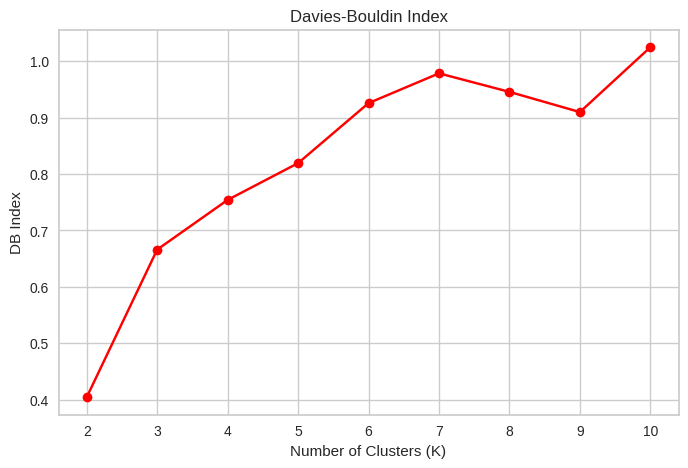

In [38]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin Index
def compute_db_index(X, max_k=10):
    db_vals = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        db_vals.append(davies_bouldin_score(X, labels))
    return db_vals

db_vals = compute_db_index(X, max_k=10)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), db_vals, marker='o', color='red')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('DB Index')
plt.show()

### Summary of Methods

| Method                      | Objective                                         | Interpretation for Optimal K   |
|------------------------------|--------------------------------------------------|--------------------------------|
| **Inertia (Elbow Method)**    | Minimize the sum of squared distances (inertia). | "Elbow" point where the curve flattens. |
| **Silhouette Score**          | Maximize the mean silhouette score.              | Maximize the score close to 1. |
| **Davies-Bouldin Index**      | Minimize the Davies-Bouldin index.               | Minimize the DB index.         |

Each method offers a different perspective on determining the optimal number of clusters, and it is often useful to use a combination of methods to get a more comprehensive understanding of the cluster structure in the data.

## Centroid Initialization Methods


As k-means clustering aims to converge on an optimal set of cluster centers (centroids) and cluster membership based on distance from these centroids via successive iterations, it is intuitive that the more optimal the positioning of these initial centroids, the fewer iterations of the k-means clustering algorithms will be required for convergence. This suggests that some strategic consideration to the initialization of these initial centroids could prove useful.

What methods of centroid initialization exist? While there are a number of initialization strategies, let's focus on the following:

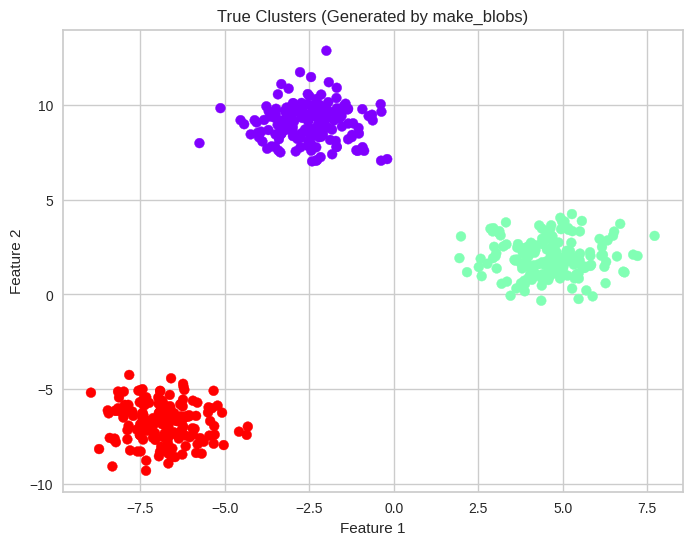

In [39]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)

# Plot the true clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s=50)
plt.title("True Clusters (Generated by make_blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [40]:
def animate_kmeans(centroids_history, labels, title, filename):
    fig, ax = plt.subplots(figsize=(8, 6))
    scat = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=50)
    centroids_plot, = ax.plot([], [], 'kx', markersize=10, markeredgewidth=2)

    ax.set_xlim(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1)
    ax.set_ylim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
    ax.set_title(title)

    def update(i):
        centroids = centroids_history[i]
        centroids_plot.set_data(centroids[:, 0], centroids[:, 1])
        return scat, centroids_plot

    ani = animation.FuncAnimation(fig, update, frames=len(centroids_history), interval=500, repeat=False)

    # Save the animation as a GIF
    ani.save(filename, writer='imagemagick', fps=1)
    plt.close()

In [46]:
from IPython.display import Image

def display_gif(filename):
    return Image(filename=filename)

#### Random Initialization in K-means

The traditional K-means algorithm initializes centroids **randomly**. This means that K random data points are selected as the initial centroids. However, random initialization has several limitations:
- **Suboptimal convergence**: If the initial centroids are poorly chosen, K-means may converge to a local minimum, resulting in suboptimal clustering.
- **Inconsistent results**: Running K-means multiple times may yield different clustering results due to random starting points.


In [42]:
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.animation as animation

In [43]:
random_state = 42
n_clusters = 3
max_iter = 10
np.random.seed(random_state)

MovieWriter imagemagick unavailable; using Pillow instead.


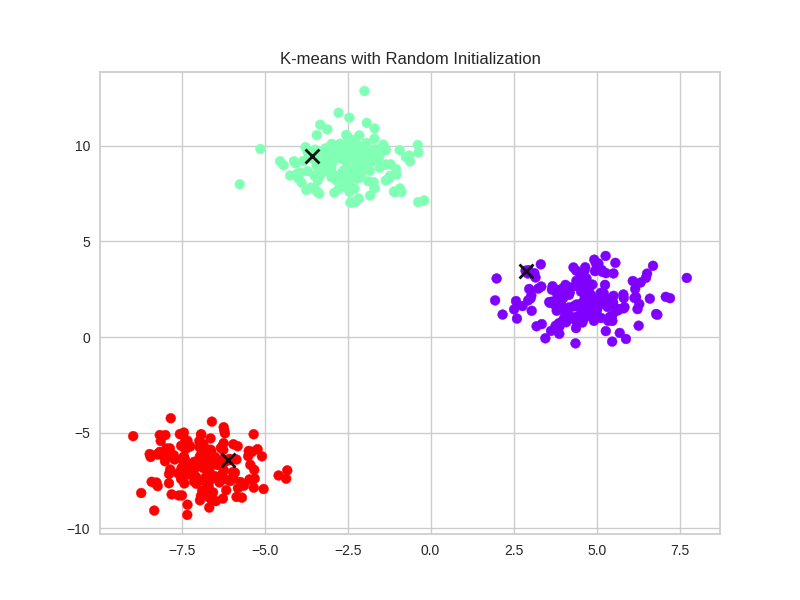

In [47]:
centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
centroids_history = [centroids.copy()]

for i in range(max_iter):
    labels = pairwise_distances_argmin(X, centroids)
    new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(n_clusters)])
    centroids_history.append(new_centroids)
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

animate_kmeans(centroids_history, labels, title="K-means with Random Initialization", filename="random_init.gif")
display(display_gif("random_init.gif"))

#### K-means++

**K-means++** is an improved initialization algorithm that addresses the limitations of random initialization. It ensures that centroids are chosen in a more strategic way:
1. The first centroid is chosen randomly from the data points.
2. For each remaining centroid, data points that are farther away from existing centroids are more likely to be selected.
   - Specifically, each point is chosen with a probability proportional to its distance from the nearest centroid.
   
This method ensures that the initial centroids are spread out, leading to:
- **Faster convergence**: The algorithm requires fewer iterations to converge.
- **Better clustering quality**: The algorithm is less likely to get stuck in local minima, resulting in more optimal clusters.

MovieWriter imagemagick unavailable; using Pillow instead.


K-means++ Initialization Animation:


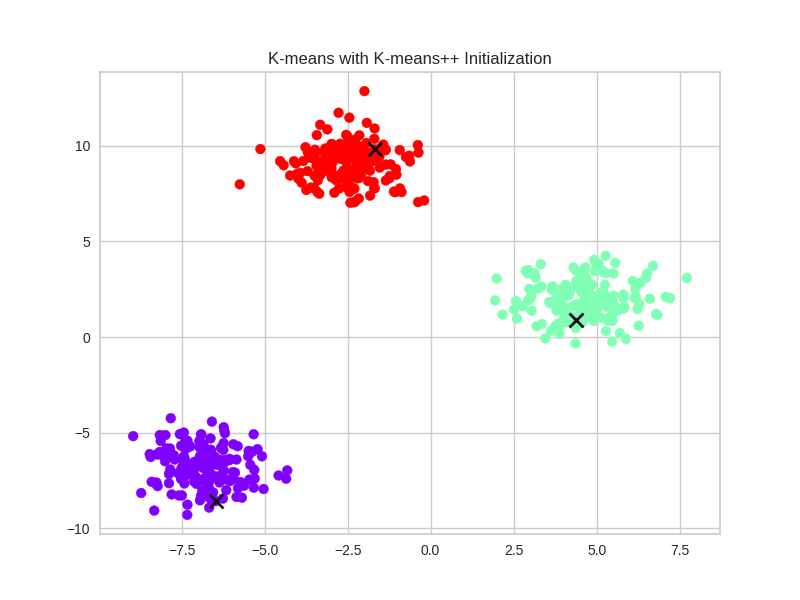

In [48]:
centroids = [X[np.random.choice(X.shape[0])]]
for _ in range(1, n_clusters):
    distances = np.min([np.linalg.norm(X - c, axis=1) for c in centroids], axis=0)
    probs = distances / distances.sum()
    next_centroid = X[np.random.choice(X.shape[0], p=probs)]
    centroids.append(next_centroid)

centroids = np.array(centroids)
centroids_history = [centroids.copy()]

for i in range(max_iter):
    labels = pairwise_distances_argmin(X, centroids)
    new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(n_clusters)])
    centroids_history.append(new_centroids)
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids


animate_kmeans(centroids_history, labels, title="K-means with K-means++ Initialization", filename="kmeanspp_init.gif")

print("K-means++ Initialization Animation:")
display(display_gif("kmeanspp_init.gif"))

**Comparison of K-means vs. K-means++**

| Aspect                     | K-means (Random Initialization) | K-means++ (Strategic Initialization) |
|-----------------------------|---------------------------------|---------------------------------------|
| **Centroid Placement**       | Randomly chosen from data points | Chosen to be as far apart as possible |
| **Convergence Speed**        | Slower, more iterations needed   | Faster, fewer iterations              |
| **Cluster Quality**          | Risk of suboptimal clustering    | More likely to find optimal clusters  |
| **Reproducibility**          | Inconsistent across runs         | More stable and consistent results    |


# Applications

- **Customer Segmentation:** Clustering helps in grouping customers based on similar behavior, preferences, or purchasing patterns.

- **Anomaly Detection:** It can be used to detect unusual data points, which can be useful in fraud detection, outlier detection, etc.

- **Image Compression:** By clustering similar pixels together, clustering algorithms like K-means can reduce the amount of information needed to represent an image.

- **Data Simplification:** Clustering reduces complexity by categorizing the data, allowing simpler models to be used in downstream tasks.

### **Image Segmentation**

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

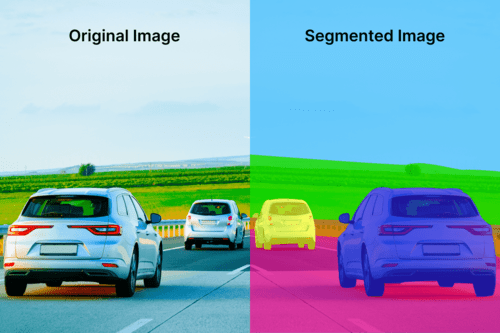

Downloading...
From: https://drive.google.com/uc?id=16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb
To: /home/dibahadie/Documents/College/college_7/TA/ML/SharifiZarchi Introduction_to_Machine_Learning main Jupyter_Notebooks-Chapter_02_Unsupervised_Learning/Clustering/elephant.jpg
100%|███████████████████████████████████████| 36.2k/36.2k [00:00<00:00, 133kB/s]
(330, 500, 3)


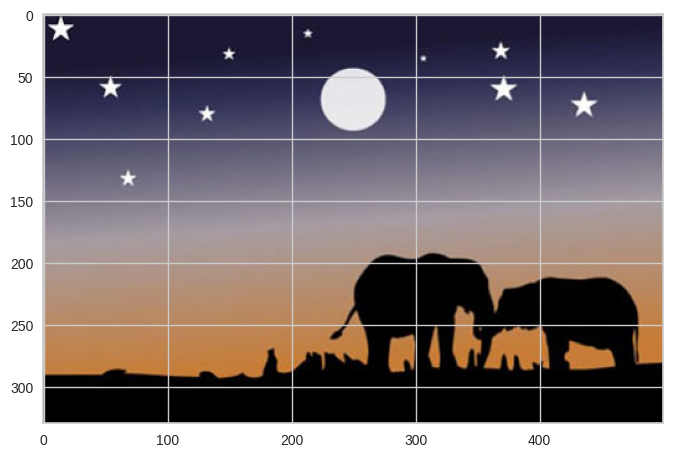

In [52]:
# Load data
import warnings
import cv2
warnings.filterwarnings("ignore")

# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
# You might need to install gdown using !pip install gdown
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

plt.imshow(im) # as RGB Format
plt.show()

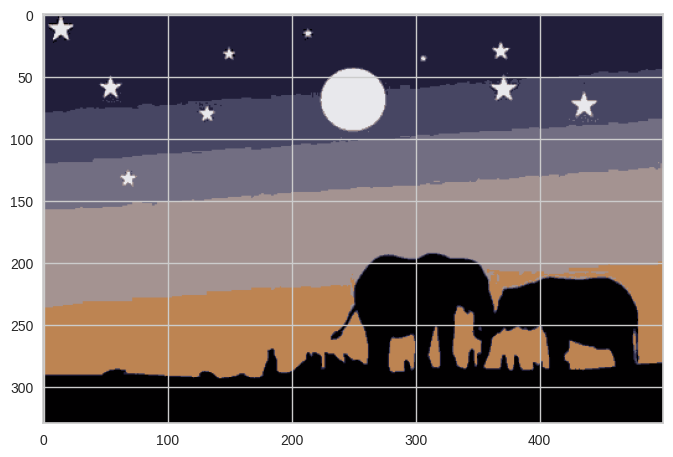

In [53]:
all_pixels  = im.reshape((-1,3))

kmeans = KMeans(n_clusters=7)
kmeans.fit(all_pixels)

new_img = np.zeros((330*500,3),dtype='uint8')

colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()

### **Customer Segmentation**

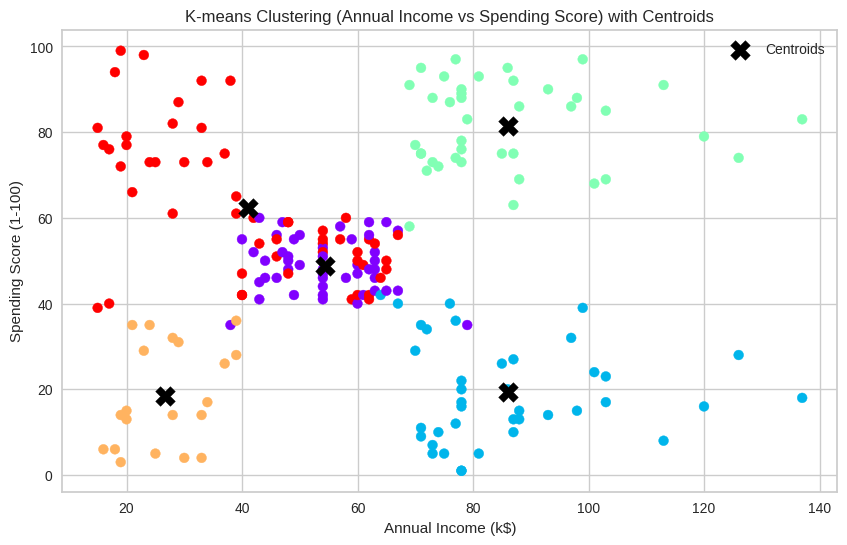

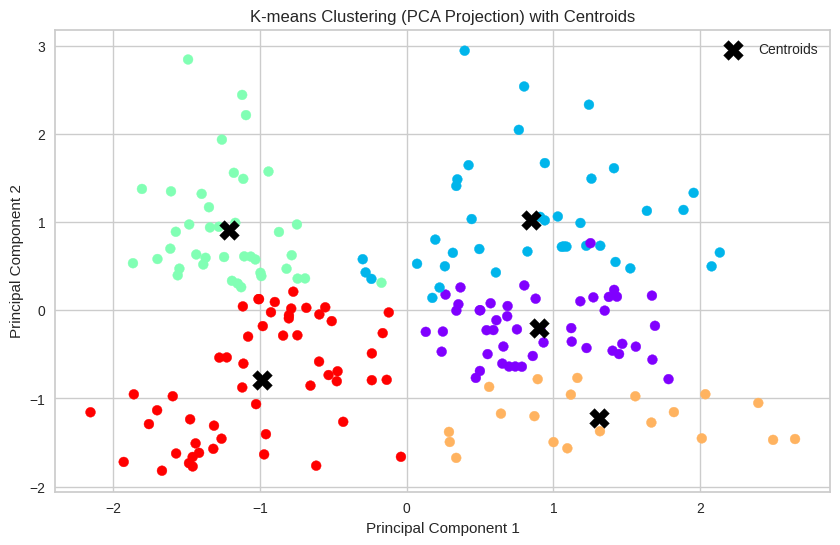

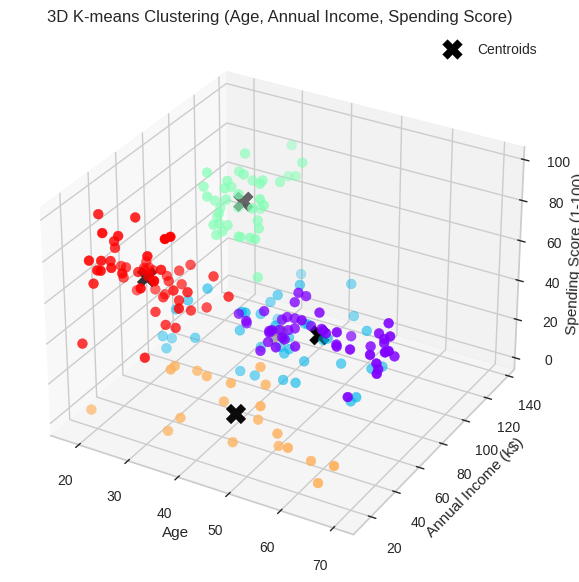

         Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0  55.275862           47.620690               41.706897        0
1  32.875000           86.100000               81.525000        1
2  25.769231           26.115385               74.846154        2
3  26.733333           54.311111               40.911111        3
4  44.387097           89.774194               18.483871        4


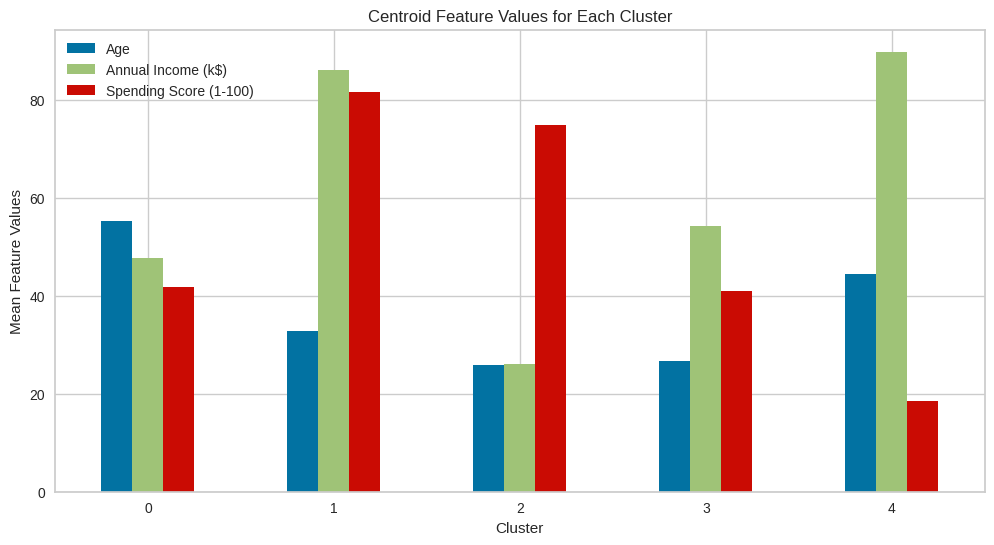

In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Load the dataset (replace the path with the correct one if needed)
df = pd.read_csv('assets/Mall_Customers.csv')

# Display the first 5 rows of the dataset
df.head()

# Drop the 'CustomerID' column as it's irrelevant for clustering
df = df.drop(columns=['CustomerID'])

# Optionally encode the 'Gender' column (1 for Male, 0 for Female)
df['Genre'] = df['Genre'].map({'Male': 1, 'Female': 0})

# Select features to cluster on (e.g., Age, Annual Income, and Spending Score)
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering with 5 clusters initially
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Get the centroids
centroids = kmeans.cluster_centers_

# Inverse transform the centroids back to the original scale for plotting
centroids_original = scaler.inverse_transform(centroids)

# Add the cluster labels to the original dataset for analysis
df['Cluster'] = labels

# Plot clusters using Annual Income and Spending Score and add centroids
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels, cmap='rainbow', s=50)
plt.scatter(centroids_original[:, 1], centroids_original[:, 2], c='black', s=200, marker='X', label='Centroids')
plt.title("K-means Clustering (Annual Income vs Spending Score) with Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# Reduce the dataset to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Reduce the centroids using the same PCA transformation
centroids_pca = pca.transform(centroids)

# Plot the clusters in the reduced 2D space with centroids
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', s=50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.title("K-means Clustering (PCA Projection) with Centroids")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# 3D visualization using Age, Annual Income, and Spending Score
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels, cmap='rainbow', s=50)

# Plot the centroids in 3D
ax.scatter(centroids_original[:, 0], centroids_original[:, 1], centroids_original[:, 2],
           c='black', s=200, marker='X', label='Centroids')

# Set plot titles and labels
ax.set_title("3D K-means Clustering (Age, Annual Income, Spending Score)")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.legend()

plt.show()

# Final K-means clustering with the optimal number of clusters (replace 5 with optimal k)
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add the cluster labels to the original dataset
df['Cluster'] = labels

# Analyze the centroids
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=X.columns)
centroids_df['Cluster'] = range(len(centroids_df))
print(centroids_df)

# Visualize the centroid values
centroids_df.set_index('Cluster').plot(kind='bar', figsize=(12, 6))
plt.title("Centroid Feature Values for Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Feature Values")
plt.xticks(rotation=0)
plt.show()


### **Anomaly Detection**

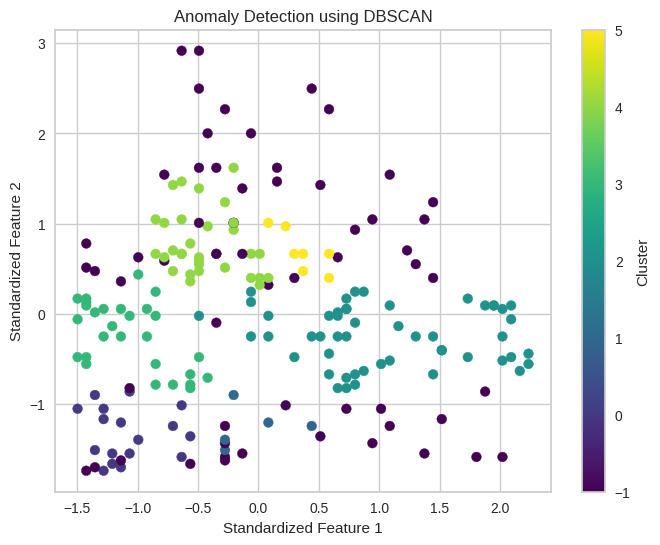

In [56]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Apply DBSCAN for anomaly detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_dbscan, cmap='viridis')
plt.title('Anomaly Detection using DBSCAN')
plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')
plt.colorbar(label='Cluster')
plt.show()


### **Image Compression**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.3306690738754696e-16..0.9685457516339868].


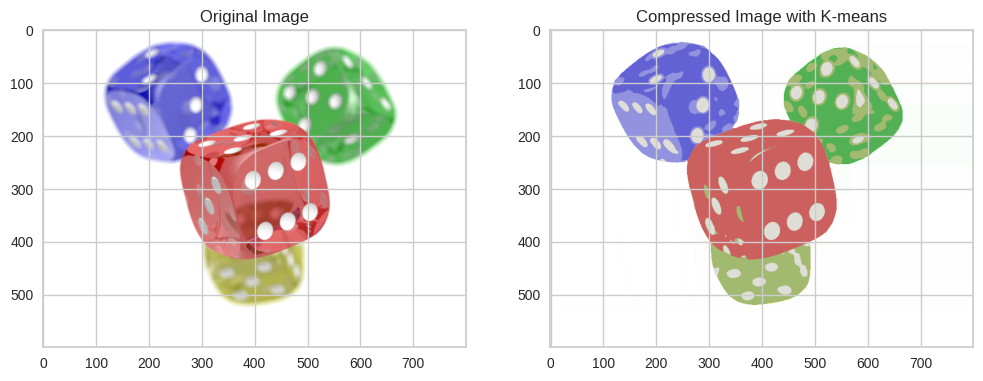

In [60]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

# Load an example image
image = io.imread('assets/PNG_transparency_demonstration_1.png')
image = np.array(image, dtype=np.float64) / 255  # Normalize

# Reshape the image to be a long list of RGB values
w, h, d = image.shape
image_array = np.reshape(image, (w * h, d))

# Randomly sample a subset of the image
image_sample = shuffle(image_array, random_state=0)[:1000]

# Perform K-means clustering on the RGB values
kmeans = KMeans(n_clusters=16, random_state=0).fit(image_sample)
labels = kmeans.predict(image_array)

# Recreate the compressed image using the cluster centers (colors)
image_compressed = kmeans.cluster_centers_[labels].reshape(w, h, d)

# Display original and compressed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')

ax[1].imshow(image_compressed)
ax[1].set_title('Compressed Image with K-means')
plt.show()


### **Data Samplification**

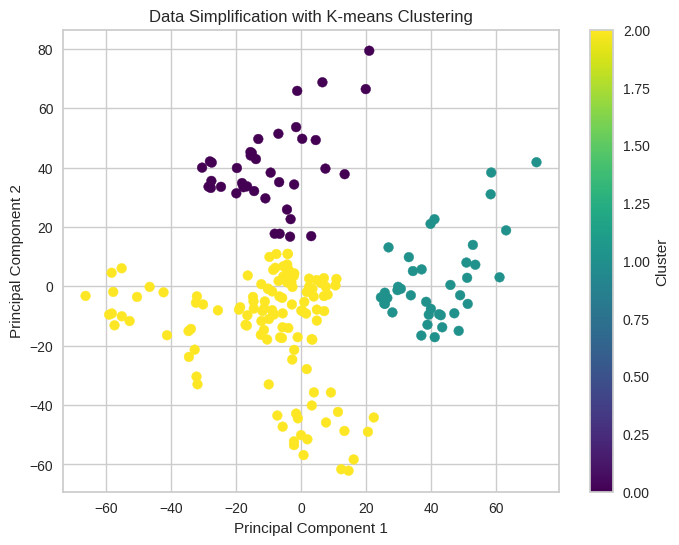

In [61]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)

# Visualize the clustering using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.title('Data Simplification with K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


# TODO

### K-means Increments

**Mini Batch K-means**





## Other clustering methods

**DBSCAN**

## Clustering Comparison Metrics

* Homogeneity - measures whether or not all of its clusters contain only data points which are members of a single class.
* Completeness - measures whether or not all members of a given class are elements of the same cluster
* V-measure - the harmonic mean between homogeneity and completeness